# Complete Kalman's filter : Correction & Prediction

In [1]:
%matplotlib inline

import numpy as np
from numpy import cos, sin, pi
from scipy.linalg import det, expm, inv, sqrtm
import matplotlib.pyplot as plt
from numpy.random import randn

## Background


Last notebook investigated the correction phase of the Kalman's filter, which could be used as a linear estimator.
The second phase of the filter is called Prediction and, given the measurements $y_{0}$, ..., $y_{k}$, computes the expected state $\hat{x}_{k+1|k}$  and its covariance matrix $\Gamma_{k+1|k}$/
The following diagram summarizes these two phases, the left square being the Correction and the right one the Prediction.

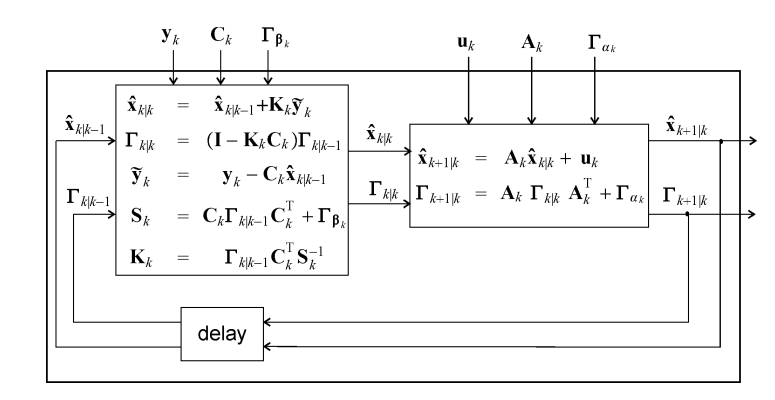

The final algorithm is therefore 

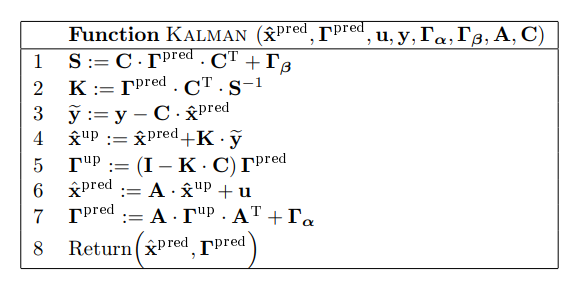

Because of numerical errors, $\Gamma_{k|k}$ can sometimes lose its positivity, therefore the following formulation is sometimes preferred : $\Gamma_{k|k} = \sqrt{(I - K_{k}.C_{k})\Gamma_{k|k-1} \bigg[(I - K_{k}.C_{k})\Gamma_{k|k-1}\bigg]^{T} }$

Note : 
### Predictor mode :

When no measurement is available, the filter uses only the Prediction block, and y, $\Gamma_{\beta}$ and C are empty quantities.
Since nothing is known about the initial state, it is typical to choose $\hat{x}_{0} = (0, ...,0)$ and $\Gamma_{x}(0) = m.Diag(n)$, with $m >>1$.

# Ex 7.10

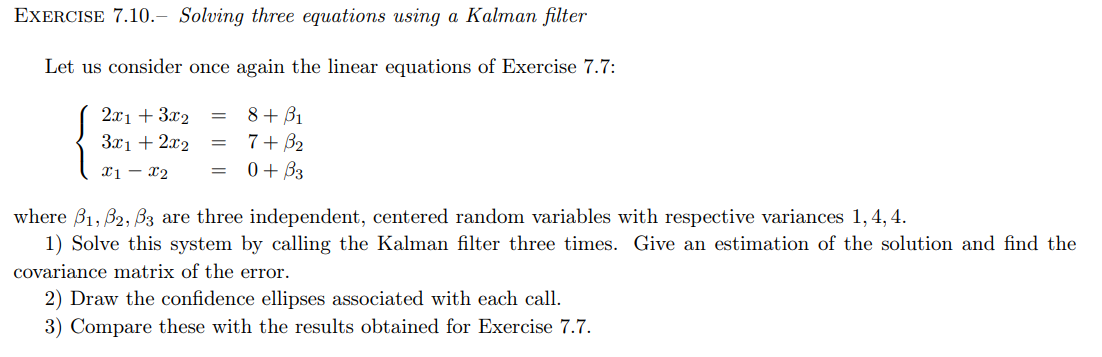

In [2]:
def kalman_correction(xc, y, C, G_x, G_b):
    yt = y - C @ xc
    G_y = C @ G_x @ C.T + G_b
    K = G_x @ C.T @ np.linalg.inv(G_y)
    xc = xc + K @ yt
    G_x = G_x - K @ C @ G_x
    return xc, G_x

def kalman_prediction(xc, G_x, A, u, G_alpha):
    xc = A@xc + u 
    G_x = A@G_x@A.T + G_alpha
    return xc, G_x


## 1) Solving the system in 3 iterations

x = (x1, x2)

Stationnary case :  $x_{k+1} = I.x_{k} + 0$

In [3]:
# stationnary case : A = I, u = 0
A = np.identity(2)
u = np.zeros((2, 1))
G_alpha = np.zeros((2,2))

#1st guess
xc = np.array([[0],
               [0]])

G_x = np.array([[1000, 0],
                [0, 1000]])


y = np.array([[[8]],
              [[7]],
              [[0]]])
C = np.array([[[2, 3]], 
              [[3, 2]],
              [[1, -1]]])
G_b = np.array([[[1]],
                [[4]], 
                [[4]]])


for i in range(3):
    print("iter ", i)
    
    xc, G_x = kalman_correction(xc, y[i], C[i], G_x, G_b[i])
    xc, G_x = kalman_prediction(xc, G_x, A, u, G_alpha)

    print("xc = \n", xc)
    print("gamma_x = \n", G_x)
    print("=================================")


iter  0
xc = 
 [[1.23067456]
 [1.84601185]]
gamma_x = 
 [[ 692.33135913 -461.50296131]
 [-461.50296131  307.74555803]]
iter  1
xc = 
 [[1.00079777]
 [1.99920176]]
gamma_x = 
 [[ 1.59601012 -1.1968879 ]
 [-1.1968879   0.99756617]]
iter  2
xc = 
 [[1.31106051]
 [1.75542009]]
gamma_x = 
 [[ 0.72809271 -0.51494217]
 [-0.51494217  0.46174331]]


Result is comfortable, the error covariance decreases (and remains symmetical).

## 2) Confidence ellipse

In [4]:
def ellipse(mean, G, eta, lbl, one_iter='true'):
    """
    to plot confidence ellispe
    :param mean: mean vector of distribution
    :param G: Covariance matrix of distribution
    :param eta: distribution remains inside the ellipse with proba eta
    """
    a = np.sqrt(-2 * np.log(1 - eta))
    theta = np.linspace(0, 2 * np.pi, 100)
    if one_iter:
        plt.figure()
        
    w = np.repeat(mean, 100, axis=1)
    sq = sqrtm(G)
    W = w + a*sq@np.array([np.cos(theta), np.sin(theta)])

            
    X = W[0]
    Y = W[1]
    plt.plot(X, Y, label = lbl)
    if one_iter:
        plt.axis('square')
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('confidence ellipse at eta = {}'.format(eta))
        plt.show()

<IPython.core.display.Javascript object>


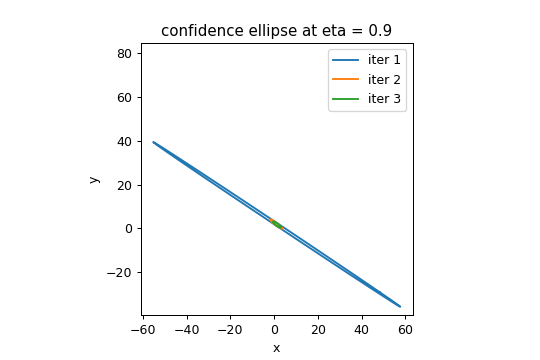

In [5]:
%matplotlib notebook

xc = np.array([[0],
               [0]])

G_x = np.array([[1000, 0],
                [0, 1000]])

eta = 0.9

plt.figure()
for i in range(3):
    xc, G_x = kalman_correction(xc, y[i], C[i], G_x, G_b[i])
    xc, G_x = kalman_prediction(xc, G_x, A, u, G_alpha)
    ellipse(xc, G_x, eta=eta, lbl="iter {}".format(i+1), one_iter = False)
plt.axis('square')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('confidence ellipse at eta = {}'.format(eta))
plt.show()


Which matches with precedent results, when the iteration increase, the filter becomes more confident in the estimation of x, and the confidence ellipses associated are more narrow.

## Bonus : One step Kalman's filter

We apply the filter a single time, by choosing the adequate matrices

In [6]:
# stationnary case : A = I, u = 0
A = np.identity(2)
u = np.zeros((2, 1))
G_alpha = np.zeros((2,2))

#1st guess
xc = np.array([[0],
               [0]])

G_x = np.array([[1000, 0],
                [0, 1000]])


y = np.array([[8],
              [7],
              [0]])
C = np.array([[2, 3], 
              [3, 2],
              [1, -1]])

G_b = np.zeros((3,3))
G_b[0,0] = 1
G_b[1,1] = 4
G_b[2,2] = 4

xc, G_x = kalman_correction(xc, y, C, G_x, G_b)
xc, G_x = kalman_prediction(xc, G_x, A, u, G_alpha)

print("xc = \n", xc)
print("gamma_x = \n", G_x)
print("=================================")

xc = 
 [[1.31106051]
 [1.75542009]]
gamma_x = 
 [[ 0.72809271 -0.51494217]
 [-0.51494217  0.46174331]]


We obtain exactly the same result than before (with three steps) in a single step, and it is somewhat less burdening to implement.
This demonstrates that the Kalman's filter can be used iteratively or directly (matrix multiplication). But this example shows that the Kalman's filter becomes a little more confident at each iteration.

# Ex 7.11

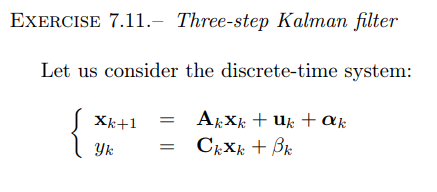



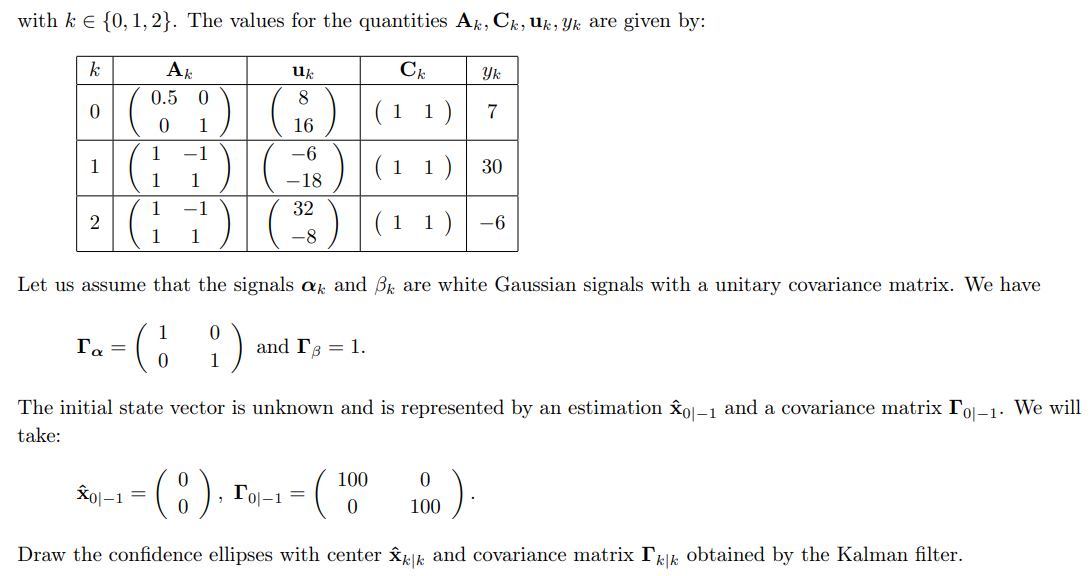

In [7]:
# initial data

A = np.zeros((3, 2, 2))
A[0] = np.array([[0.5, 0],
                 [0,1]])
A[1] = np.array([[1, -1],
                 [1, 1]])
A[2] = np.array([[1,-1],
                 [1,1]])

u = np.zeros((3, 2, 1))
u[0]=np.array([[8],
               [16]])
u[1] = np.array([[-6],
                 [-18]])
u[2]=np.array([[32], 
               [-8]])

C = np.zeros((3, 1, 2))
C[0]= np.array([[1,1]])
C[1] = np.array([[1, 1]])
C[2] = np.array([[1, 1]])

y = np.zeros((3, 1, 1))
y[0]=np.array([[7]])
y[1] = np.array([[30]])
y[2] = np.array([[-6]])


G_alpha = np.array([[1,0],[0,1]])
G_b = np.array([[1]])
xc = np.array([[0],[0]])
G_x = np.array([[100, 0], [0, 100]])



<IPython.core.display.Javascript object>


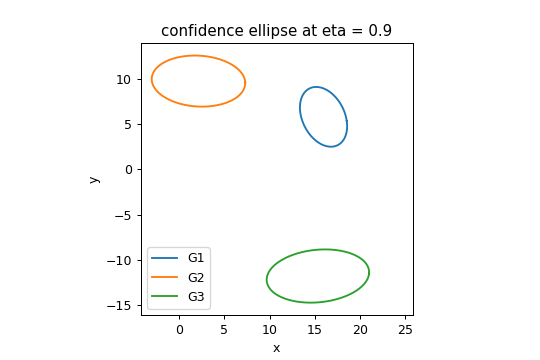

x1 =
 [[15.95212851]
 [ 5.81067112]]
G1 =
 [[ 1.47426446 -0.58303641]
 [-0.58303641  2.36704136]]
x2 =
 [[2.14050065]
 [9.75872703]]
G2 =
 [[ 5.79050789 -0.24291709]
 [-0.24291709  1.72790841]]
x3 =
 [[ 15.32896943]
 [-11.77167199]]
G3 =
 [[6.94952955 0.50576507]
 [0.50576507 1.87550703]]


In [9]:
# loop

GL = []
XL = []
eta = 0.9
plt.figure()
for i in range(0, 3):
    xc, G_x = kalman_correction(xc, y[i], C[i], G_x, G_b)
    xc, G_x = kalman_prediction(xc, G_x, A[i], u[i], G_alpha)
    print("x{} =\n {}".format(i+1,xc))
    print("G{} =\n {}".format(i+1,G_x))
    print("===================================")
    GL.append(G_x)
    XL.append(xc)
    
    ellipse(xc, G_x, eta, 'G{}'.format(i+1), one_iter = False)
plt.axis('square')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('confidence ellipse at eta = {}'.format(eta))
plt.show()